In [9]:
# where to save images?
save_img_dir = '/Users/jnaiman/Downloads/tmp/fake_figs/skyimages/'

In [140]:
from astroquery.skyview import SkyView
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

In [4]:
SkyView.list_surveys()

{'Allbands:GOODS/HDF/CDF': ['GOODS: Chandra ACIS HB',
                            'GOODS: Chandra ACIS FB',
                            'GOODS: Chandra ACIS SB',
                            'GOODS: VLT VIMOS U',
                            'GOODS: VLT VIMOS R',
                            'GOODS: HST ACS B',
                            'GOODS: HST ACS V',
                            'GOODS: HST ACS I',
                            'GOODS: HST ACS Z',
                            'Hawaii HDF U',
                            'Hawaii HDF B',
                            'Hawaii HDF V0201',
                            'Hawaii HDF V0401',
                            'Hawaii HDF R',
                            'Hawaii HDF I',
                            'Hawaii HDF z',
                            'Hawaii HDF HK',
                            'GOODS: HST NICMOS',
                            'GOODS: VLT ISAAC J',
                            'GOODS: VLT ISAAC H',
                            'GOODS: 

Sky queries:

* position : str
Determines the center of the field to be retrieved. Both
    coordinates (also equatorial ones) and object names are
    supported. Object names are converted to coordinates via the
    SIMBAD or NED name resolver. See the reference for more info
    on the supported syntax for coordinates.
  
* survey : str or list of str
  Select data from one or more surveys. The number of surveys
    determines the number of resulting file downloads. Passing a
    list with just one string has the same effect as passing this
    string directly.
  
* coordinates : str
    Choose among common equatorial, galactic and ecliptic
    coordinate systems (``"J2000"``, ``"B1950"``, ``"Galactic"``,
    ``"E2000"``, ``"ICRS"``) or pass a custom string.

* projection : str
    Choose among the map projections (the value in parentheses
    denotes the string to be passed):

    * Gnomonic (Tan), default value
        good for small regions
    * Rectangular (Car)
        simplest projection
    * Aitoff (Ait)
        Hammer-Aitoff, equal area projection good for all sky maps
    * Orthographic (Sin)
        Projection often used in interferometry
    * Zenith Equal Area (Zea)
        equal area, azimuthal projection
    * COBE Spherical Cube (Csc)
        Used in COBE data
    * Arc (Arc)
        Similar to Zea but not equal-area
      
* pixels : str
    Selects the pixel dimensions of the image to be produced. A
    scalar value or a pair of values separated by comma may be
    given. If the value is a scalar the number of width and height
    of the image will be the same. By default a 300x300 image is
    produced.
  
* scaling : str
    Selects the transformation between pixel intensity and
    intensity on the displayed image. The supported values are:
    ``"Log"``, ``"Sqrt"``, ``"Linear"``, ``"HistEq"``,
    ``"LogLog"``.
  
* sampler : str
    The sampling algorithm determines how the data requested will
    be resampled so that it can be displayed.
  
* resolver : str
    The name resolver allows to choose a name resolver to use when
    looking up a name which was passed in the ``position`` parameter
    (as opposed to a numeric coordinate value). The default choice
    is to call the SIMBAD name resolver first and then the NED
    name resolver if the SIMBAD search fails.

* lut : str
    Choose from the color table selections to display the data in
    false color.
  
* grid : bool
    overlay a coordinate grid on the image if True
  
* gridlabels : bool
    annotate the grid with coordinates positions if True
  
* radius : `~astropy.units.Quantity` or None
    The angular radius of the specified field.
    Overrides the ``width`` and ``height`` parameters.
    
* width : `~astropy.units.Quantity` or None
    The width of the specified field.  Must be specified
    with ``height``.
  
* height : `~astropy.units.Quantity` or None
    The height of the specified field.  Must be specified
    with ``width``.

In [84]:
#img_list2 = SkyView.get_images(position='SN 2011FE', survey='SwiftXRTCnt', pixels=140)
img_list2 = SkyView.get_images(position='SN 2011FE', survey='SwiftXRTInt', pixels=140)

In [86]:
icount = 1

for iimg, img in enumerate(img_list2):
    img.writeto(save_img_dir + 'image_' + str(iimg+icount).zfill(4) + '.fits')

Now, try plotting:

In [12]:
# following: https://learn.astropy.org/tutorials/celestial_coords1.html

from astropy.wcs import WCS
from astropy.io import fits
import matplotlib.pyplot as plt

In [87]:
header_data_unit_list = fits.open(save_img_dir + 'image_'+str(icount).zfill(4) + '.fits')

In [88]:
header_data_unit_list.info()

Filename: /Users/jnaiman/Downloads/tmp/fake_figs/skyimages/image_0001.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     112   (140, 140)   float32   


In [89]:
image = header_data_unit_list[0].data
header = header_data_unit_list[0].header

In [90]:
header

SIMPLE  =                    T / Written by SkyView Fri Jun 07 09:55:16 EDT 2024
BITPIX  =                  -32 / 4 byte floating point                          
NAXIS   =                    2 / Two dimensional image                          
NAXIS1  =                  140 / Width of image                                 
NAXIS2  =                  140 / Height of image                                
CRVAL1  =              210.774 / Reference longitude                            
CRVAL2  =              54.2737 / Reference latitude                             
RADESYS = 'FK5     '           / Coordinate system                              
EQUINOX =               2000.0 / Epoch of the equinox                           
CTYPE1  = 'RA---TAN'           / Coordinates -- projection                      
CTYPE2  = 'DEC--TAN'           / Coordinates -- projection                      
CRPIX1  =                 70.5 / X reference pixel                              
CRPIX2  =                 70

In [92]:
#header['bunit']

In [93]:
wcs_helix = WCS(header)

In [94]:
wcs_helix

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN' 'DEC--TAN' 
CRVAL : 210.774 54.2737 
CRPIX : 70.5 70.5 
PC1_1 PC1_2  : 1.0 0.0 
PC2_1 PC2_2  : 0.0 1.0 
CDELT : -0.001 0.001 
NAXIS : 140  140

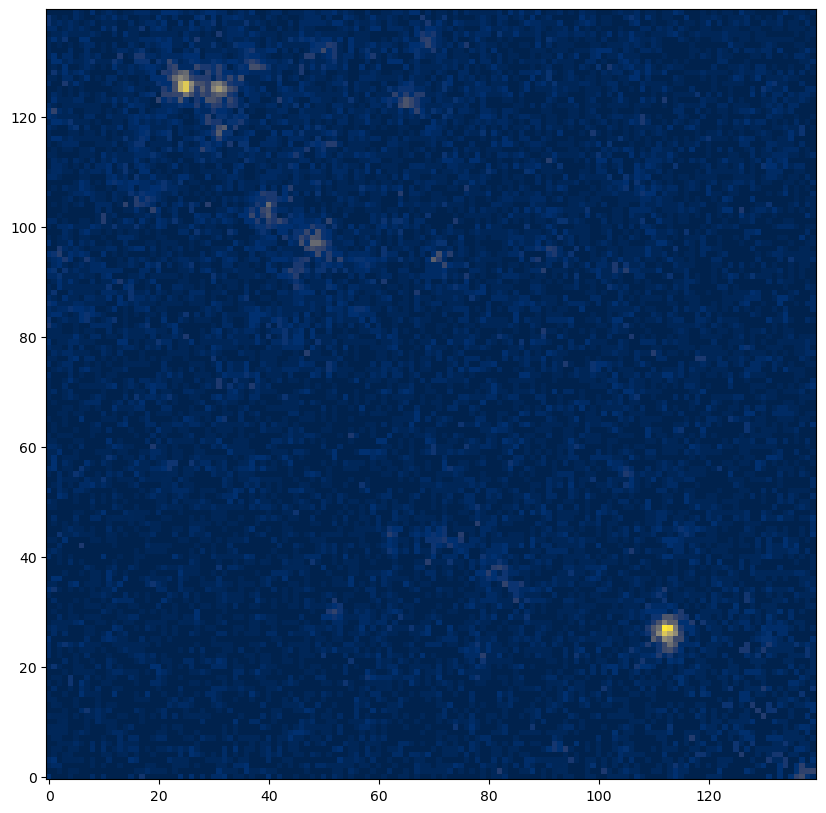

In [95]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(image, origin='lower', cmap='cividis')

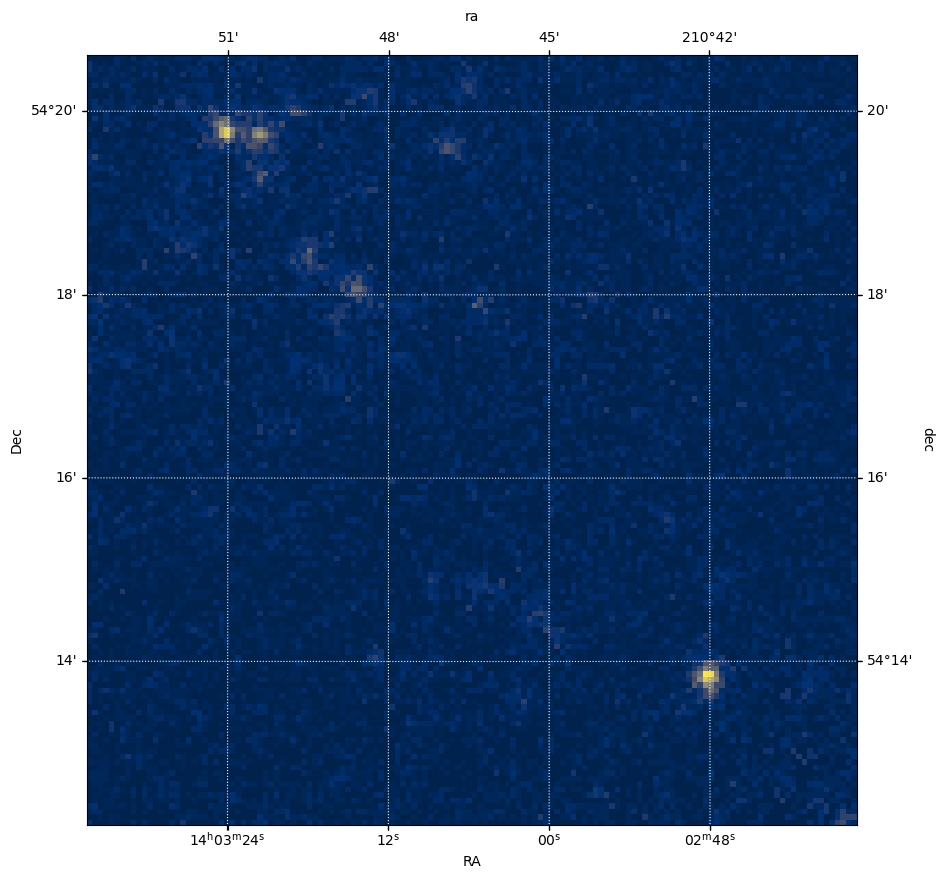

In [96]:
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(projection=wcs_helix)
plt.imshow(image, origin='lower', cmap='cividis', aspect='equal')
plt.xlabel(r'RA')
plt.ylabel(r'Dec')

overlay = ax.get_coords_overlay('icrs')
overlay.grid(color='white', ls='dotted')

In [ ]:
# wcs = WCS(hdu.header)
# fig = plt.figure(figsize=(16,12))
# fig.add_subplot(121, projection=wcs)
# plt.imshow(convolved_image_q, cmap='seismic', vmin=-0.5, vmax=0.5, origin='lower')#, cmap=plt.cm.viridis)
# plt.xlabel('RA')
# plt.ylabel('Dec')
# plt.colorbar()

# fig.add_subplot(122, projection=wcs)
# plt.imshow(convolved_image_u, cmap='seismic', vmin=-0.5, vmax=0.5, origin='lower')#, cmap=plt.cm.viridis)

# plt.xlabel('RA')
# plt.ylabel('Dec')
# plt.colorbar()

In [99]:
import matplotlib.axes as maxes

hi


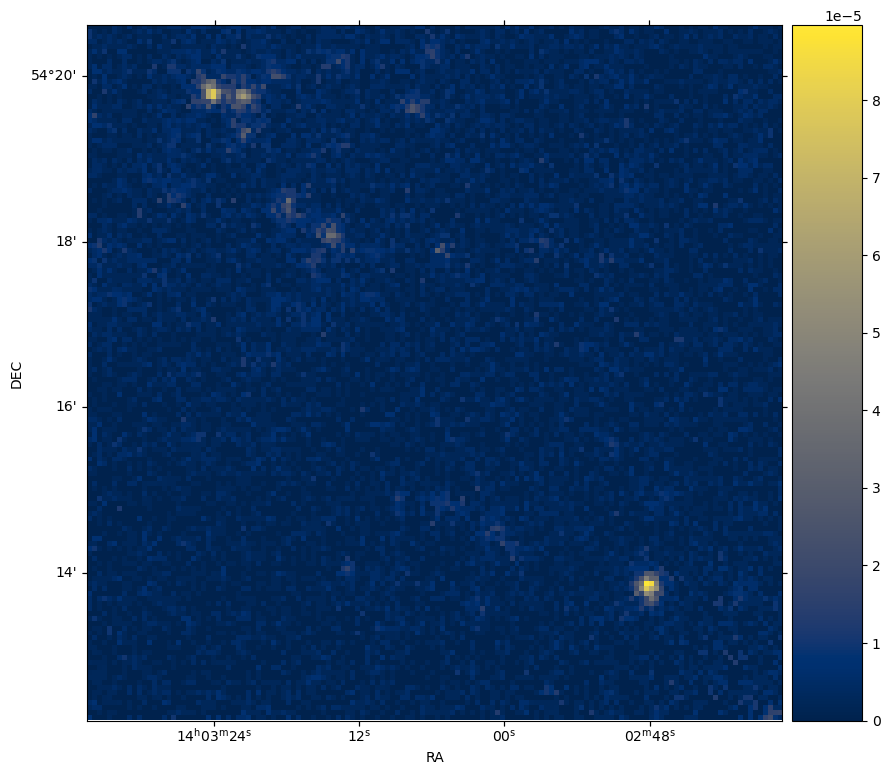

In [101]:
side = 'right'
size = 0.1
pad = 0.1
#orientation = 'horizontal'
orientation = 'vertical'



fig = plt.figure(figsize=(10, 10))

ax = plt.subplot(projection=wcs_helix)

ishow = ax.imshow(image, origin='lower', cmap='cividis', aspect='equal')
ax.set_xlabel(r'RA')
ax.set_ylabel(r'DEC')


#side = np.random.choice(choices, p=probs)
# size = np.random.uniform(low=plot_params['color bar']['size percent']['min'], 
#              high=plot_params['color bar']['size percent']['max'])
size = str(int(round(size*100)))+'%'

# pad = np.random.uniform(low=plot_params['color bar']['pad']['min'], 
#                          high=plot_params['color bar']['pad']['max'])

divider = make_axes_locatable(ax)

cax = divider.append_axes(side, size=size, pad=pad, axes_class=maxes.Axes)
# the side of the axis
if side == 'right': # this maybe should become a random selection?
    axis_side = 'right'
    print('hi')
    cax.yaxis.set_ticks_position(axis_side)
    #cax.axes.get_xaxis().set_visible(False)
    #cax.xaxis.set_ticks([])
    #cax.xaxis.set_visible(False)
elif side == 'left':
    axis_side = 'left'
    cax.yaxis.set_ticks_position(axis_side)
elif side == 'top':
    axis_side = 'top'
    cax.xaxis.set_ticks_position(axis_side)
elif side == 'bottom':
    axis_side = 'bottom'
    cax.xaxis.set_ticks_position(axis_side)


# cbar = fig.colorbar(data_from_plot['data'], 
#              cax=data_from_plot['color bar'], 
#              orientation=orientation)

cbar = fig.colorbar(ishow, 
             cax=cax, 
             orientation=orientation)

#plt.draw()

#cbar.xaxis.set_xticks([])
cbar.ax.xaxis.set_ticks([])

plt.show()

In [102]:
# #plt.figure()
# fig = plt.figure(figsize=(10, 10))

# ax = plt.subplot(projection=wcs_helix)

# ishow = ax.imshow(image, cmap='gray')

# fig.colorbar(ishow)

# plt.show()

In [103]:
#SkyView.get_images?

In [104]:
from astroquery.simbad import Simbad

In [107]:
#Simbad.list_tables()
# pdf lists
pdfs_dir = '/Users/jnaiman/Dropbox/wwt_image_extraction/ADSDownloads/pdfs/'

from glob import glob

In [113]:
pdfs = glob(pdfs_dir + '*pdf')

# into names
paper_names = []
for p in pdfs:
    paper_names.append(p.split('/')[-1].split('.pdf')[0].replace('_','.'))

In [114]:
paper_names[:5]

['1993ApJ...416L..71W',
 '1940ApJ....91..528S',
 '1972AJ.....77..459K',
 '1996ApJS..107..143T',
 '1985AJ.....90..473O']

In [124]:
#ipaper = 200

paper_success = []

for ipaper in range(len(paper_names)):
    result_table = Simbad.query_bibobj(paper_names[ipaper])
    if result_table is not None:
        print(paper_names[ipaper])
        paper_success.append(paper_names[ipaper])
        if len(paper_success) > 10: import sys; sys.exit()
        

print(result_table)

1996ApJS..107..143T


1985AJ.....90..473O


1968AJ.....73..590D


1987AJ.....93.1454A


1976ApJ...209..882Y


1991ApJ...379..621H


1979AJ.....84.1763B


1989AJ.....97.1607D


1994ApJ...430..467V


1985AJ.....90.2445G
1983ApJS...51..337F


SystemExit: 

/opt/anaconda3/envs/FullProcess/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [125]:
ipaper

13

In [126]:
result_table

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,SCRIPT_NUMBER_ID
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,int32
SNR G119.5+10.2,00 06.6,+72 47,3,3,--,--,0,E,,2003A&A...411L..59E,1
SNR G126.2+01.6,01 22.0,+64 15,3,3,--,--,0,E,R,2009BASI...37...45G,1
SNR G156.4-01.2,04 28,+47.1,2,2,--,--,0,E,,,1
SNR G166.0+04.3,05 26 30.000,+42 56 00.00,7,7,--,--,0,D,,2015ApJS..217....2M,1
LBN 166.16+04.52,05 27.3,+42 58,3,3,--,--,0,E,O,1976A&AS...25...25D,1
IC 443,06 17 00.0000,+22 34 11.998,11,11,--,--,0,E,,2022ApJS..260...53A,1
ESO 134-11,14 40 29,-62 38.7,4,4,--,--,0,E,,1982ESO...C......0L,1
SNR G315.0-02.3,14 43 00,-62 30.0,4,4,--,--,0,E,R,2014BASI...42...47G,1


In [127]:
len(paper_names)

9543

,MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,SCRIPT_NUMBER_ID
0,SNR G119.5+10.2,00 06.6,+72 47,3,3,NaN,NaN,0,E,,2003A&A...411L..59E,1
1,SNR G126.2+01.6,01 22.0,+64 15,3,3,NaN,NaN,0,E,R,2009BASI...37...45G,1
2,SNR G156.4-01.2,04 28,+47.1,2,2,NaN,NaN,0,E,,,1
3,SNR G166.0+04.3,05 26 30.000,+42 56 00.00,7,7,NaN,NaN,0,D,,2015ApJS..217....2M,1
4,LBN 166.16+04.52,05 27.3,+42 58,3,3,NaN,NaN,0,E,O,1976A&AS...25...25D,1
5,IC 443,06 17 00.0000,+22 34 11.998,11,11,NaN,NaN,0,E,,2022ApJS..260...53A,1
6,ESO 134-11,14 40 29,-62 38.7,4,4,NaN,NaN,0,E,,1982ESO...C......0L,1
7,SNR G315.0-02.3,14 43 00,-62 30.0,4,4,NaN,NaN,0,E,R,2014BASI...42...47G,1
8,SNR G065.2+05.7,19 33.0,+31 10,3,3,NaN,NaN,0,E,R,2009BASI...37...45G,1
9,NAME Cyg Loop,20 51.0,+30 40,3,3,NaN,NaN,0,E,R,2009BASI...37...45G,1


In [144]:
iobj = 0

img_list3 = SkyView.get_images(position=result_table['MAIN_ID'][0], survey='SwiftXRTCnt', pixels=140)

In [145]:
# get last img num
def get_nextnum():
    imgs = glob(save_img_dir + '*.fits')
    #imgs
    imgnums = []
    for im in imgs:
        imgnums.append(int(im.split('image_')[-1].split('.fits')[0]))
    
    nextNum = np.max(imgnums) + 1
    return nextNum

In [146]:
for img in img_list3:
    nextNum = get_nextnum()
    img.writeto(save_img_dir + 'image_' + str(nextNum).zfill(4) + '.fits')
    print('saved:', save_img_dir + 'image_' + str(nextNum).zfill(4) + '.fits')

saved: /Users/jnaiman/Downloads/tmp/fake_figs/skyimages/image_0003.fits


In [147]:
icount = 3

header_data_unit_list = fits.open(save_img_dir + 'image_'+str(icount).zfill(4) + '.fits')

image = header_data_unit_list[0].data
header = header_data_unit_list[0].header

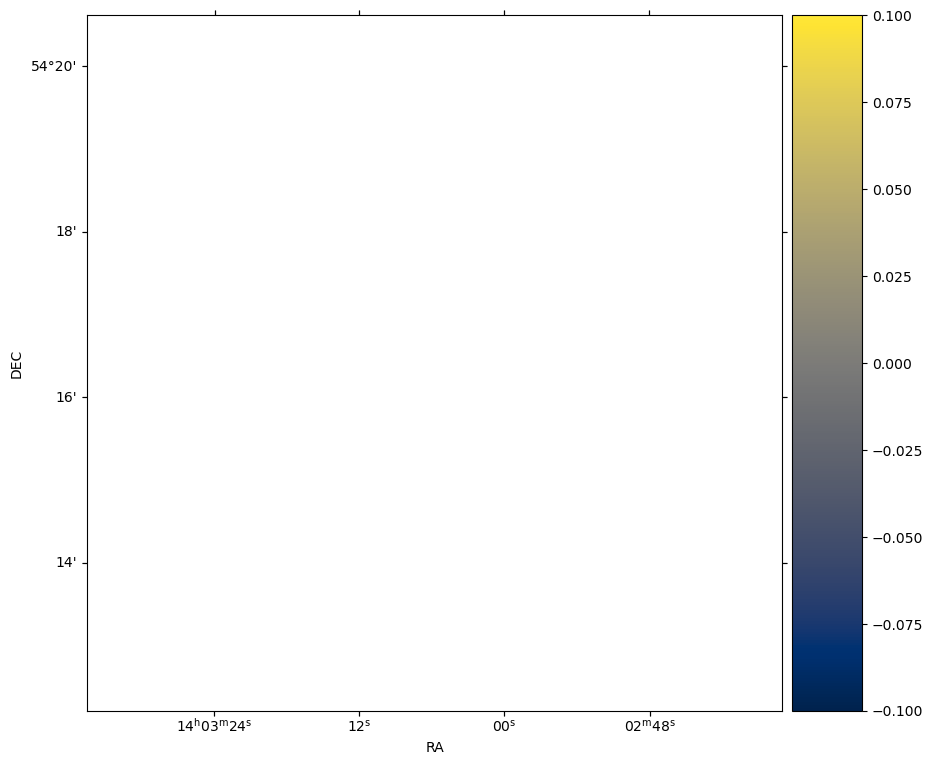

In [148]:
side = 'right'
size = 0.1
pad = 0.1
#orientation = 'horizontal'
orientation = 'vertical'



fig = plt.figure(figsize=(10, 10))

ax = plt.subplot(projection=wcs_helix)

ishow = ax.imshow(image, origin='lower', cmap='cividis', aspect='equal')
ax.set_xlabel(r'RA')
ax.set_ylabel(r'DEC')

size = str(int(round(size*100)))+'%'

divider = make_axes_locatable(ax)

cax = divider.append_axes(side, size=size, pad=pad, axes_class=maxes.Axes)
# the side of the axis
if side == 'right': # this maybe should become a random selection?
    axis_side = 'right'
    cax.yaxis.set_ticks_position(axis_side)
elif side == 'left':
    axis_side = 'left'
    cax.yaxis.set_ticks_position(axis_side)
elif side == 'top':
    axis_side = 'top'
    cax.xaxis.set_ticks_position(axis_side)
elif side == 'bottom':
    axis_side = 'bottom'
    cax.xaxis.set_ticks_position(axis_side)


cbar = fig.colorbar(ishow, 
             cax=cax, 
             orientation=orientation)

# #plt.draw()

# #cbar.xaxis.set_xticks([])
# cbar.ax.xaxis.set_ticks([])

plt.show()

In [149]:
SkyView.get_images?

Signature:
SkyView.get_images(
    position,
    survey,
    *,
    coordinates=None,
    projection=None,
    pixels=None,
    scaling=None,
    sampler=None,
    resolver=None,
    deedger=None,
    lut=None,
    grid=None,
    gridlabels=None,
    radius=None,
    height=None,
    width=None,
    cache=True,
    show_progress=True,
)
Docstring:
Query the SkyView service, download the FITS file that will be
found and return a generator over the local paths to the
downloaded FITS files.

Note that the files will be downloaded when the generator will be
exhausted, i.e. just calling this method alone without iterating
over the result won't issue a connection to the SkyView server.

Parameters
----------
position : str
    Determines the center of the field to be retrieved. Both
    coordinates (also equatorial ones) and object names are
    supported. Object names are converted to coordinates via the
    SIMBAD or NED name resolver. See the reference for more info
    on the supported s